## Capstone 3: Data Wrangling and EDA on X-Ray data set


# 1. Load data and install necessary libraries 

In [1]:
pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os

2025-02-01 18:48:33.705139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Reasoning behind tools used:

- matplotlib: will be used for visulization during EDA and model evaluation metrics such as loss and accuracy curves.

- seaborn: might be used for advanced visualization techniques such as heat maps. 

- keras: high level API that simplifies building and training deep learning models. I will be using functions in keras for building, preprocessing, data augmentation and evaluation of the models.

- sklearn: I will be using for splitting of data and evaluation metrics like accuracy, precision, reccal and F1-score to assess model performance.

- cv2: OpenCV will be used for reading, processing ang augmenting of images before feeding them into the CNN.

- os: wil be used to manage file paths, load datasets and iterate over image directories. 

- pandas: used for EDA for summary statistics. Splitting data into train/test sets

- numpy: used for numeric operations on images, image processing, preprocessing and normalization. 

### Created a function that gets data from directory, gives it a numberic lable based on category, resizes image and combines resized image with numeric lable.  

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # Numeric label for the category
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print(f"Skipping file {img} as it could not be read.")
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Resize image
                data.append([resized_arr, class_num])  # Add image and label
            except Exception as e:
                print(f"Error processing file {img}: {e}")
    return np.array(data, dtype=object)  # Allow mixed data types (image, label)

In [6]:
#print(os.getcwd())
#/Users/vcarrillo/Downloads/chest_xray/__MACOSX/chest_xray

# 2. EDA

In [7]:
train = get_training_data('/Users/vcarrillo/Downloads/chest_xray/train')


In [8]:
print(f'Number of images in training set is {len(train)}.')

Number of images in training set is 5216.


In [9]:
test = get_training_data('/Users/vcarrillo/Downloads/chest_xray/test')

In [10]:
print(f'Number of images in test set is {len(test)}.')

Number of images in test set is 624.


In [11]:
val = get_training_data('/Users/vcarrillo/Downloads/chest_xray/val')

In [12]:
print(f'Number of images in validation set is {len(val)}.')

Number of images in validation set is 16.


/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_38157/1137843332.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_series, palette={"Pneumonia": "red", "Normal": "green"})


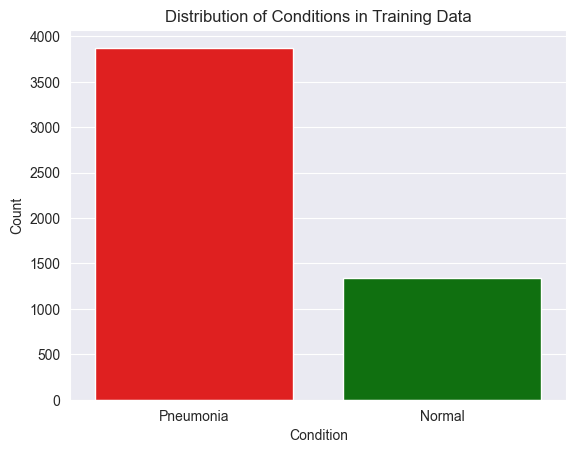

In [13]:
# Convert the list to a Pandas Series for Seaborn compatibility
list = []
for i in train:
    if i[1] == 0:
        list.append("Pneumonia")
    else:
        list.append("Normal")

# Convert to Pandas Series
label_series = pd.Series(list, name="Condition")

# Plot with Seaborn
sns.set_style('darkgrid')
sns.countplot(x=label_series, palette={"Pneumonia": "red", "Normal": "green"})

# Add titles and labels
plt.title("Distribution of Conditions in Training Data")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

In [14]:
#Count number of conditions 
label_series.value_counts()

Condition
Pneumonia    3875
Normal       1341
Name: count, dtype: int64

In [15]:
#Total number of images in training set 
label_series.value_counts().sum()


5216

In [16]:
#Percent of training images that are pneumonia 
Pneumonia_percent = round((3875/5216)*100)

print(f'Proportion of images that are pneumonia {Pneumonia_percent}%')

Proportion of images that are pneumonia 74%


## Notes: Almost 75% of the images in training data are pneumonia! The dataset is heavily imbalanced and I will have to address this during preprocessing. 

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_38157/3196046928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_series2, palette={"Pneumonia": "red", "Normal": "green"})


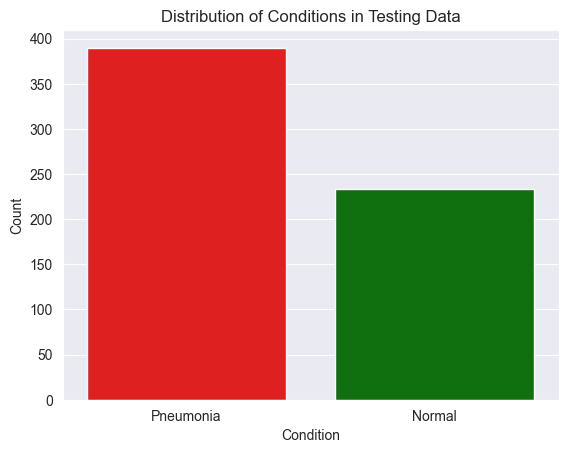

In [17]:
# Convert the list to a Pandas Series for Seaborn compatibility
list2 = []
for i in test:
    if i[1] == 0:
        list2.append("Pneumonia")
    else:
        list2.append("Normal")

# Convert to Pandas Series
label_series2 = pd.Series(list2, name="Condition")

# Plot with Seaborn
sns.set_style('darkgrid')
sns.countplot(x=label_series2, palette={"Pneumonia": "red", "Normal": "green"})

# Add titles and labels
plt.title("Distribution of Conditions in Testing Data")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

In [18]:
#Count number of conditions 
label_series2.value_counts()

Condition
Pneumonia    390
Normal       234
Name: count, dtype: int64

In [19]:
#Total number of images in training set 
label_series2.value_counts().sum()

624

In [20]:
#Percent of test images that are pneumonia 
Pneumonia_percent = round((390/624)*100)

print(f'Proportion of rest images that are pneumonia {Pneumonia_percent}%')

Proportion of rest images that are pneumonia 62%


## Observation: Dataset is imbalanced! 

## Possible Soluntions: Oversampling, undersampling, or data augmentation. 

In [21]:
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")


Training set size: 5216
Validation set size: 16
Test set size: 624


## Visualizing differences in pixel intensity between Normal and Pneumonia 

In [22]:
print(type(train))

<class 'numpy.ndarray'>


### 0 is Normal and 1 is Pneumonia 

In [23]:
# Separate images by condition normal and pneumonia 
normal_images = train[train[:, 1] == 0][:, 0]  # Images with 0 are Normal
pneumonia_images = train[train[:, 1] == 1][:, 0]  # Images with label 1 are Pneumonia



In [24]:
# Flatten pixel values for each class
def flatten_pixel_intensities(images):
    intensities = []
    for img in images:
        intensities.extend(img.ravel())  # Flatten and collect pixel values
    return np.array(intensities)

# Calculate pixel intensities
normal_intensities = flatten_pixel_intensities(normal_images)
pneumonia_intensities = flatten_pixel_intensities(pneumonia_images)


In [25]:
#Mean for normal intensities 
normal_intensities.mean()

123.0886053046595

In [26]:
#Median of normal images intensity 
np.median(normal_intensities)

134.0

In [27]:
#Mean for Pneumonia intensities 
pneumonia_intensities.mean()

122.27166668323805

In [28]:
#Median of pneumonia images intensity 
np.median(pneumonia_intensities)

132.0

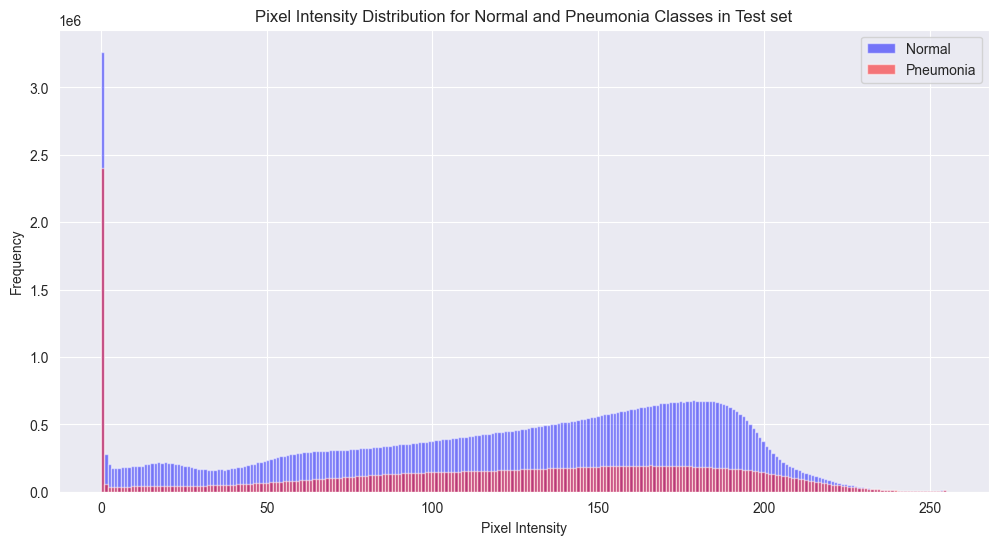

In [29]:
#Visualize the difference in intensity between both conditions.

#Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(normal_intensities, bins=256, alpha=0.5, label='Normal', color='blue', range=(0, 255))
plt.hist(pneumonia_intensities, bins=256, alpha=0.5, label='Pneumonia', color='red', range=(0, 255))
plt.title('Pixel Intensity Distribution for Normal and Pneumonia Classes in Test set')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()



## Observation: Pixel intensity seems to be an important feature in separating x-Ray images with and without pneumonia. 

## Visualizing some of the training data images

Text(0.5, 1.0, 'NORMAL')

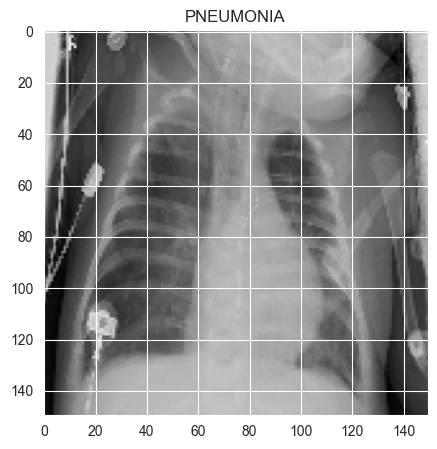

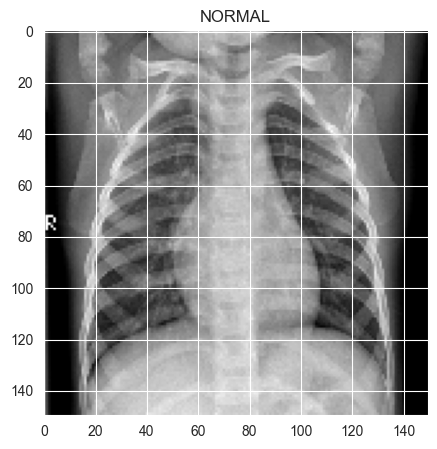

In [30]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

### Sanity check to make sure images are same size.

In [31]:

print(train[0][0].size) #150*150
print(train[-1][0].size)

22500
22500


### EDA Insights:

- Training data is heavily imbalanced with 74% of images being of pneumonia class. This has to be addressed or model will be biased and overfit to the majority class 'Pneumonia'. I will most likely add class_weights to help address imbalance. 
- Pixel intensity appears to be an important feature and I will have to apply normalization techniques so model learns to focus on other features as well. 
- I considered using PCA to help reduce complexity of data but given that CNN learn spatial features automatically, PCA might hurt performance. 

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
Each of these layers plays a role in constructing the CNN:

Conv2D – Applies convolution operations to extract features.
MaxPool2D – Reduces spatial dimensions to prevent overfitting.
Flatten – Converts feature maps into a 1D vector for the dense layers.
Dense – Fully connected layer for classification.
Dropout – Reduces overfitting by randomly dropping neurons.
BatchNormalization – Normalizes activations to improve convergence speed.

# 3. Preprocessing 

In [32]:
#Train test split
from sklearn.model_selection import train_test_split

In [33]:
img_size = 224  # Updated size to match model input


# Extract images and labels
X_train = np.array([cv2.resize(item[0], (img_size, img_size)) for item in train])
y_train = np.array([item[1] for item in train])

X_test = np.array([cv2.resize(item[0], (img_size, img_size)) for item in test])
y_test = np.array([item[1] for item in test])

X_val = np.array([cv2.resize(item[0], (img_size, img_size)) for item in val])
y_val = np.array([item[1] for item in val])

# Normalize
X_train, X_test, X_val = X_train / 255.0, X_test / 255.0, X_val / 255.0

# Reshape to match model input shape
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)
X_val = X_val.reshape(-1, img_size, img_size, 1)

In [34]:
train_dir = '/Users/vcarrillo/Downloads/chest_xray/train'

In [35]:
test_dir = '/Users/vcarrillo/Downloads/chest_xray/test'

# 4. Modeling

### Build CNN model and complie.

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),#16 filters, 3x3 kernel, ReLU activation, input shape 244x244x1
    tf.keras.layers.MaxPooling2D(2, 2),#MaxPooling layers after each convolution to reduce spatial dimensions
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),#progressivley increasing filter count from 16 to 32 to 64
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),#Each conv layer reduces image size while extracting more complex features
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),#converts 2D feature maps to 1D vector
    tf.keras.layers.Dense(100, activation='relu'),#100 neurons, ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')#1 neuron with sigmoid activation for binary classification.
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#Complie model 
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [38]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,326,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,349,897 (16.59 MB)

 Trainable params: 4,349,897 (16.59 MB)

 Non-trainable params: 0 (0.00 B)

## Addressing imbalance in dataset

In [39]:
from sklearn.utils.class_weight import compute_class_weight


In [40]:

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train) #class_weight tells model that each class has to contribute equally to model learning.
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 0.6730322580645162, 1: 1.9448173005219984}


In [89]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


#history = model.fit(X_train,y_train,
#                   epochs=10,#model trains for 10 complete epochs
#                   class_weight = class_weights, #assigns higher weights to minority class 'Normal' to reduce overfitting
#                   validation_data=(X_val, y_val),#Uses test data for validation
#                   batch_size = 32) 
                   #callbacks=[early_stopping]) #use this when training with greater number of epochs

In [41]:
#Training model with specific training parameters:

history = model.fit(X_train,y_train,
                   epochs=10,#model trains for 10 complete epochs
                   class_weight = class_weights, #assigns higher weights to minority class 'Normal' to reduce overfitting
                   validation_data=(X_val, y_val),#Uses test data for validation
                   batch_size = 32)#Uses all test batches for validation 

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 658ms/step - accuracy: 0.7836 - loss: 0.4029 - val_accuracy: 0.6250 - val_loss: 0.8716
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 648ms/step - accuracy: 0.9435 - loss: 0.1527 - val_accuracy: 0.9375 - val_loss: 0.2117
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 698ms/step - accuracy: 0.9622 - loss: 0.0925 - val_accuracy: 0.8750 - val_loss: 0.2375
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 607ms/step - accuracy: 0.9802 - loss: 0.0620 - val_accuracy: 0.8750 - val_loss: 0.2094
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 623ms/step - accuracy: 0.9798 - loss: 0.0529 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 703ms/step - accuracy: 0.9867 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0421
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 621ms/step - accuracy: 0.9816 - loss: 0.0391 - val_accuracy: 1.0000 - val_loss: 0.0445
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 593ms/step - accuracy: 0.9900 - l

In [ ]:
#Training model with specific training parameters:

#history_aug = model.fit(train_data_aug,
#                   epochs=20,#model trains for 20 complete epochs
#                   steps_per_epoch=len(train_data_aug),#uses all training batches for validation
#                   validation_data=test_data_aug,#Uses test data for validation
#                   validation_steps=len(test_data_aug))#Uses all test batches for validation 

### Potential Improvements:

- Adding Dropout layers
- Experiment with batch normalization
- Regularization techniques

In [121]:
#Visualize accuracy and loss curve
def plot_accuracy_curve(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

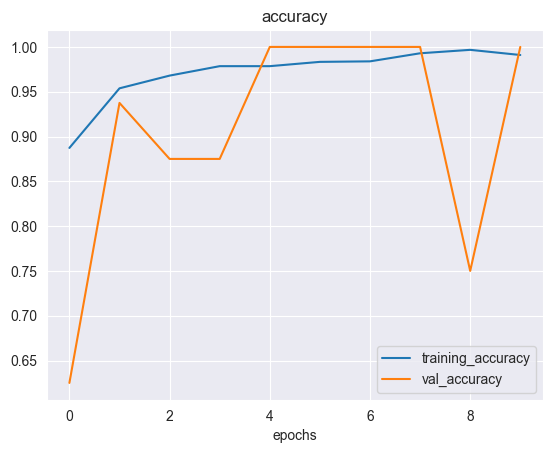

In [122]:
plot_accuracy_curve(history)

In [123]:
#Loss curve:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

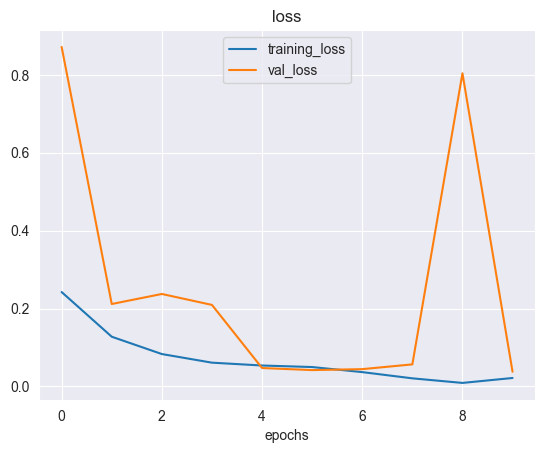

In [124]:
plot_loss_curve(history)

## Model_2 with BatchNormalization, Dropout and L2 Regularization. 

In [58]:
from tensorflow.keras.regularizers import l2

In [87]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), 
                           activation='relu', 
                           input_shape=(224, 224, 1),
                           kernel_regularizer=l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3, 3), 
                           activation='relu',
                           kernel_regularizer=l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), 
                           activation='relu',
                           kernel_regularizer=l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(100, 
                          activation='relu', 
                          kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
# Compile the model
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
history2 = model_2.fit(X_train,y_train,
                   epochs=10,#model trains for 10 complete epochs
                   class_weight = class_weights, #assigns higher weights to minority class 'Normal' to reduce overfitting
                   validation_data=(X_val, y_val),#Uses test data for validation
                   batch_size = 32, 
                   callbacks=[early_stopping])

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.8364 - loss: 2.7644 - val_accuracy: 0.5000 - val_loss: 39.9779
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.9317 - loss: 0.5447 - val_accuracy: 0.5000 - val_loss: 71.2391
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9487 - loss: 0.4661 - val_accuracy: 0.5000 - val_loss: 23.8882
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9526 - loss: 0.4147 - val_accuracy: 0.8125 - val_loss: 0.5541
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9515 - loss: 0.4259 - val_accuracy: 0.5625 - val_loss: 6.1087
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9549 - loss: 0.4208 - val_accuracy: 0.9375 - val_loss: 0.4115
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9593 - loss: 0.3495 - val_accuracy: 0.6250 - val_loss: 2.0620
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9705 - loss: 0.3003 - val_a

## Data Augmentation with Keras ImageDataGenerator

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1. rescale=1/255.
- This is a preprocessing step that normalizes pixel values.
- Converts pixel values from original 0-255 range to 0-1 range.
- This helps the neuarl network process the data more effectively by scaling down the input values.
- Important for consitent and faster model training. 


## 2. rotating_range=0.2:
- Randomly rotates images during training by up to 20 degrees.
- This increases the robustness of the model by adding variations in image orientation. 
- This will help since not all X-ray images might have same orientation.


## 3. width_shift_range=0.2:
- Permits horizontal shifting of up to 20% of the image width.
- Helps increase robustness of model since it has to learn to recognize features regardless of their orientation.
- Helps model to generalize. 

## 4. height_shift_range=0.2:
- Just like width shift but vertically.
- Allows vertical shift of images up to 20%. 
- Helps model to generalize better.

## 5. zoom_range=0.2:
- Randomly zooms in or out of images by up to 20%.
- Helps model to recognize features at different scales.
- Helps model generalize with medical images since scale may vary. 

## 6. horizontal_flip=True:
- Randomly flips images horizontally.
- Can be useful for some datasets but it should be used with caution. 
- Note: For medical images anatomical symmetry matters so it this might not be helpful!

## Potential Improvement

In [ ]:
#train_datagen = ImageDataGenerator(rescale=1/255.,
#                                   rotation_range=0.2,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True
#                                   )
#test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#train_dir = '/Users/vcarrillo/Downloads/chest_xray/train'

In [ ]:
#test_dir = '/Users/vcarrillo/Downloads/chest_xray/test'

In [ ]:
#train_data_aug = train_datagen.flow_from_directory(train_dir,
#                                              target_size=(224, 224),
#                                              batch_size=32,
#                                              color_mode='grayscale',
#                                              class_mode='binary')
#test_data_aug = test_datagen.flow_from_directory(test_dir,
#                                            target_size=(224, 224),
#                                            batch_size=32,
#                                            color_mode='grayscale',
#                                            class_mode='binary')

# 5. Model evaluation and Metrics

## Model 1 Metrics

In [46]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {(test_accuracy*100)}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9226 - loss: 0.5826
Test Loss: 1.9596
Test Accuracy: 76.76281929016113%


In [113]:
from sklearn.metrics import classification_report

# Get model predictions
y_pred_probs = model.predict(X_test)  # Probabilities from sigmoid
threshold = 0.000019142 # lower than 0.5 to increase recall 
y_pred = (y_pred_probs > threshold).astype(int)  # Convert to 0 or 1

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step
              precision    recall  f1-score   support

      Normal       0.89      0.80      0.84       390
   Pneumonia       0.72      0.84      0.77       234

    accuracy                           0.82       624
   macro avg       0.81      0.82      0.81       624
weighted avg       0.83      0.82      0.82       624



## Observations:Model Recall score for pneumonia was low. Adding a threshold of 0.000019142 raised score up to 84% but reduced precision from 96% to 72%.

## 0 = Normal 

### Precision score of 89% for Normal
### Recall score: 80% for Normal 

## 1 = Pneumonia

### Precision Score: 72% for Pneumonia 
### Recall Score: 84% for Pneumonia


Notes: Model does great when identifying X-ray images of Pneumonia patients. I suspect that overfitting might be a factor.

## Selecting optimal threshold 

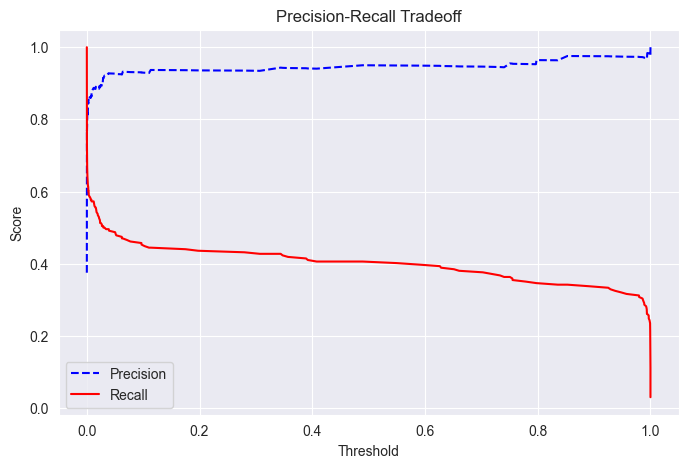

In [114]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall values at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot precision-recall vs. threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()

In [115]:
# Compute precision-recall values at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

In [116]:
# Compute F1 scores at different thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold:{best_threshold:.10f}")


Best Threshold:0.0000191421


### Potential Improvements to the model 
- 1. Number of epochs >= 50


## Model_2 Evaluation Metrics

In [117]:
# Evaluate on test set
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {(test_accuracy*100)}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9315 - loss: 0.4838
Test Loss: 1.0357
Test Accuracy: 83.01281929016113%


In [118]:
# Get model predictions
y_pred_probs = model_2.predict(X_test)  # Probabilities from sigmoid
threshold = 0.0111241741# lower than 0.5 to increase recall 
y_pred = (y_pred_probs > threshold).astype(int)  # Convert to 0 or 1

# Print classification report
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step
              precision    recall  f1-score   support

      Normal       0.91      0.92      0.91       390
   Pneumonia       0.86      0.85      0.85       234

    accuracy                           0.89       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624



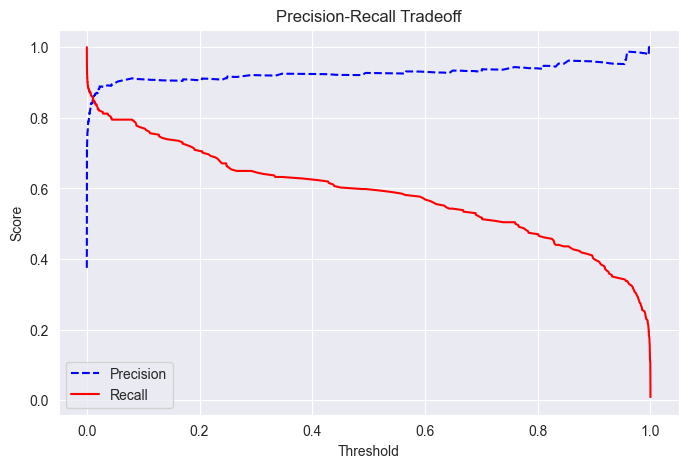

In [106]:

# precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

# precision-recall vs. threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()

In [107]:
# precision-recall at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

In [108]:
# Optimal threshold for F1 scores
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold:{best_threshold:.10f}")

Best Threshold:0.0111241741


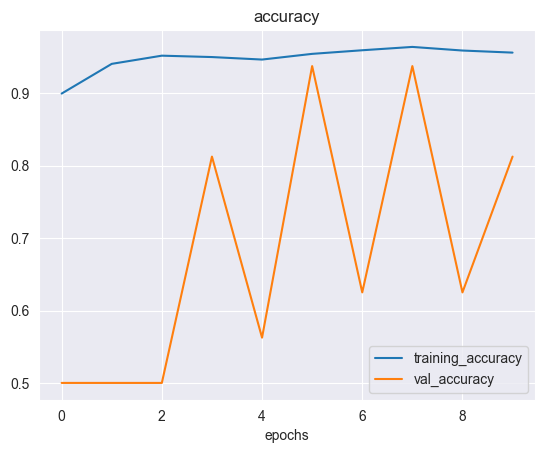

In [127]:
plot_accuracy_curve(history2)

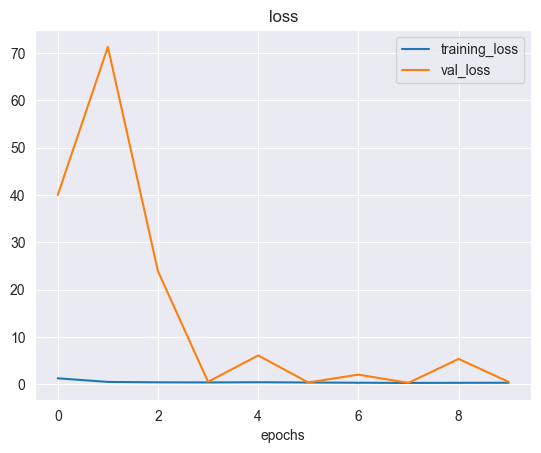

In [128]:
plot_loss_curve(history2)

# Observations:

## Normal 

Precision score:  91% for Normal
Recall score: 92% for Normal 

## Pneumonia
Precision Score: 86% for Pneumonia 
Recall Score: 85% for Pneumonia

Notes: A recall score of 85% for Pneumonia is not ideal as the cost of misidentifying a patient with pneumonia could be fatal but it is good for a base model!

# Comparing Models

## Mode 1 Metrics: Test accuracy 76%


              precision    recall  f1-score   support

      Normal       0.89      0.80      0.84       390
   Pneumonia       0.72      0.84      0.77       234

    accuracy                           0.82       624
   macro avg       0.81      0.82      0.81       624
weighted avg       0.83      0.82      0.82       624

## Model 2 Metrics: Test accuracy 83%


              precision    recall  f1-score   support

      Normal       0.91      0.92      0.91       390
   Pneumonia       0.86      0.85      0.85       234

    accuracy                           0.89       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624

### Final Thoughts:

Both models performances should improve with increased number of training epochs. The ideal number of epochs for medical images is 50. 

- Given resource restrictions on my laptop I only trained my first model on 10 epochs. Its recall score for Pneumonia detection was 88%.
- My second model performed worse at identifying patients with Pneumonia but it was an improvement from the first in identifyiing patients with out Pneumonia. 


# 6. Conclusion: Given that my stated goal was to develop a model that was effective at identifying X-ray images of patients with Pneumonia my first model achieved a Recall socre of 85%. While this leaves room for improvement considering that not identifying a patient with Pneumonia can have catostrophic consequences, this is a great first step. 

# 7. Next steps: 

1. Retrain model on at least 50 epochs as this is the suggested number for medical imaging.

2. Use oversampling techniques on Pneumonia images to increase recall score of this class. 

3. Add additional convolutional layers to increase complexity.

4. Use transfer learning with pre-trained models. ResNet, EfficientNet. 

5. Adjust Thresholds. 